In [82]:
from pymongo import MongoClient
from pymongo.son_manipulator import ObjectId
import os
import numpy as np
import datetime
import time

In [83]:
__client = MongoClient(os.environ['MONGO_DAQ_URI'])
db = __client['xebra_daq']
experiment = 'xebra'
MAX_RUN_ID = 999999  # because reasons

In [84]:
def _GetRundoc(run_id):
    query = {'run_id' : min(int(run_id), MAX_RUN_ID), 'experiment' : experiment}
    doc = db['runs'].find_one(query)

    #if doc is None:
    #    raise ValueError('No run with id %d' % run_id)
    return doc  # returns None if no doc

In [76]:
# def GetGains(run_id):
#     doc = _GetRundoc(run_id)
#     #print(doc)
#     if doc is None:
#         return np.ones(8)
#     run_start = ObjectId.from_datetime(doc['start'])
#     #print('this is run_start: ', run_start)
#     try:
#         #print(list(db['pmt_gains'].find({'_id' : {'$lte' : run_start}}).sort([('_id', -1)]).limit(1))[0])

#         earlier_doc = list(db['pmt_gains'].find({'_id' : {'$lte' : run_start}}).sort([('_id', -1)]).limit(1))[0]

#     except IndexError:
#         return np.ones(8)
#     try:
#         later_doc = list(db['pmt_gains'].find({'_id' : {'$gte' : run_start}}).sort([('_id', 1)]).limit(1))[0]
# #         print('this is later_doc: ', later_doc)
#     except IndexError:
#         return np.array(earlier_doc['adc_to_pe'])
#     earlier_cal = int(str(earlier_doc['_id'])[:8], 16)
#     later_cal = int(str(later_doc['_id'])[:8], 16)
#     return np.array([np.interp(doc['start'].timestamp(),
#                                 [earlier_cal,later_cal],
#                                 [earlier_doc['adc_to_pe'][ch], later_doc['adc_to_pe'][ch]])
#                         for ch in range(len(earlier_doc['adc_to_pe']))])

In [85]:
def GetGains(run_id):
    doc = _GetRundoc(run_id)
    #print(doc)
    if doc is None:
        return np.ones(8)
    run_start = ObjectId.from_datetime(doc['start'])
    #print('this is run_start: ', run_start)
    try:
        #print(list(db['pmt_gains'].find({'_id' : {'$lte' : run_start}}).sort([('_id', -1)]).limit(1))[0])

        earlier_doc = list(db['pmt_gains'].find({'run' : {'$lte' : run_id}}).sort([('run', -1)]).limit(1))[0]

    except IndexError:
        return np.ones(8)
    try:
        later_doc = list(db['pmt_gains'].find({'_id' : {'$gte' : run_id}}).sort([('run', 1)]).limit(1))[0]
#         print('this is later_doc: ', later_doc)
    except IndexError:
        return np.array(earlier_doc['adc_to_pe'])
    earlier_cal = int(str(earlier_doc['run'])[:8], 16)
    later_cal = int(str(later_doc['run'])[:8], 16)
    return np.array([np.interp(doc['start'].timestamp(),
                                [earlier_cal,later_cal],
                                [earlier_doc['adc_to_pe'][ch], later_doc['adc_to_pe'][ch]])
                        for ch in range(len(earlier_doc['adc_to_pe']))])

In [81]:
GetGains(140)

array([0.00459936, 0.00184538, 0.00132206, 0.00087016, 0.00137645,
       0.00460613, 0.00267682, 0.0012199 ])

In [90]:
_GetRundoc(188)

{'_id': ObjectId('5d54152f0a02e8dfcb1858e7'),
 'mode': 'kr-83m',
 'user': '143',
 'config': {'name': 'kr-83m',
  'boards': [{'board': 100,
    'crate': 0,
    'link': 0,
    'vme_address': '0',
    'type': 'V1724'}],
  'user': 'darryl',
  'description': 'Nominal background operation',
  'detector': 'xebra',
  'channels': {'100': [0, 1, 2, 3, 4, 5, 6, 7]},
  'strax_chunk_overlap': 1000000,
  'strax_output_path': '/data/storage/strax/raw/',
  'baseline_dac_mode': 'fit',
  'processing_threads': {'charon_reader_0': 2},
  'registers': [{'reg': 'EF24',
    'val': '1',
    'board': -1,
    'comment': 'Board reset, should be first'},
   {'reg': 'EF1C', 'val': 'F', 'board': -1, 'comment': 'Events per BLT'},
   {'reg': '8000', 'val': '310', 'board': -1, 'comment': 'Board config'},
   {'reg': '800C',
    'val': 'A',
    'board': -1,
    'comment': 'Buffer organization. A for new FW'},
   {'reg': '8020', 'val': '64', 'board': -1, 'comment': 'Event size in words'},
   {'reg': '8034', 'val': '0', 'b

In [49]:
GainList = []
for i in range(60,250):
    print(GetGains(i)[0])
    GainList.append(GetGains(i)[0])
GainList_gain = []
for i in range(60,250):
#     print(GetGains_gain(i)[0])
    GainList_gain.append(GetGains_gain(i)[0])
    
#print(GainList_gain)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [8]:
GetGains(200)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
run_id = 200
doc = _GetRundoc(run_id)
run_start = ObjectId.from_datetime(doc['start'])
list(db['pmt_gains'].find({'run' : {'$lt' : run_start}}).sort([('_id', -1)]).limit(1))[0]

IndexError: list index out of range

In [36]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2 

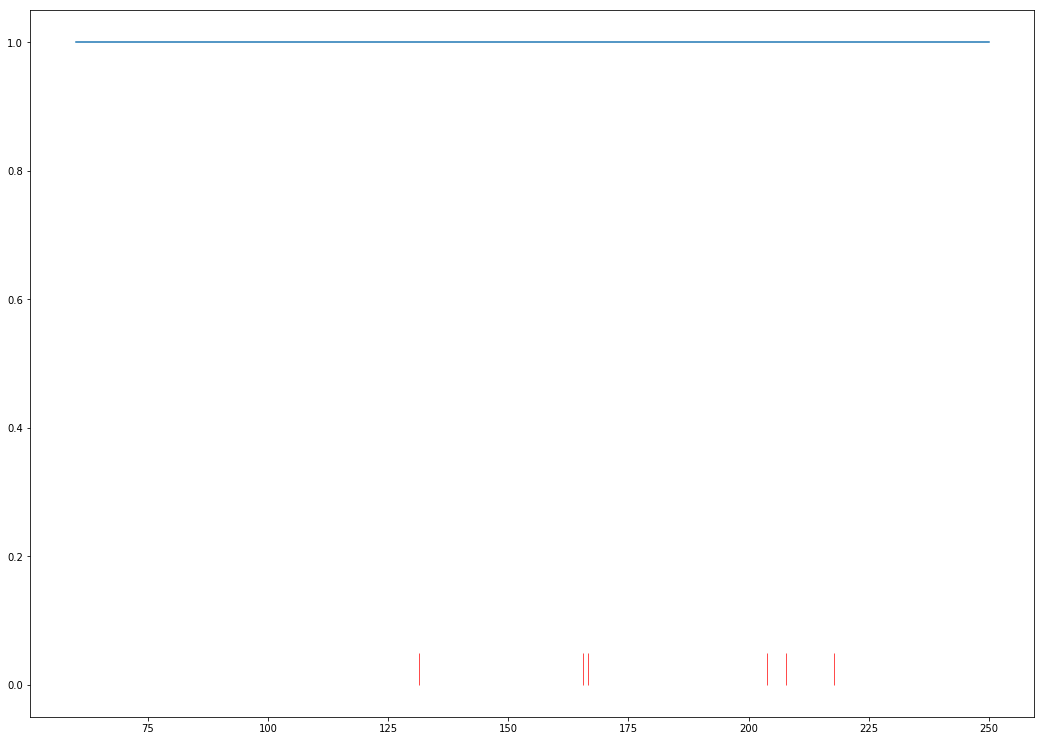

In [37]:
fig, axes = plt.subplots(figsize=(18,13))
# plt.rc('font', family='serif')
# plt.rc('axes', titlesize=25)
# plt.rc('axes', labelsize=25)

# label_size = 15 #25
# label_pad = 13 #10
# title_size = 39 #30
# title_pad = 26 #20
# axes = plt.gca()
# axes.tick_params(axis='both')
# for axis in ['top', 'bottom', 'left', 'right']:
#     axes.spines[axis].set_linewidth(2.2)
# axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
# plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
# axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
# plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


x = np.linspace(60,250,len(GainList))
axes.vlines(x = x[71], ymin = 0.0001, ymax =0.05, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[105], ymin = 0.0001, ymax =0.05, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[106], ymin = 0.0001, ymax =0.05, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[143], ymin = 0.0001, ymax =0.05, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[147], ymin = 0.0001, ymax =0.05, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[157], ymin = 0.0001, ymax =0.05, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
# x = np.linspace(60,80)
axes.plot(x, GainList)

plt.show()

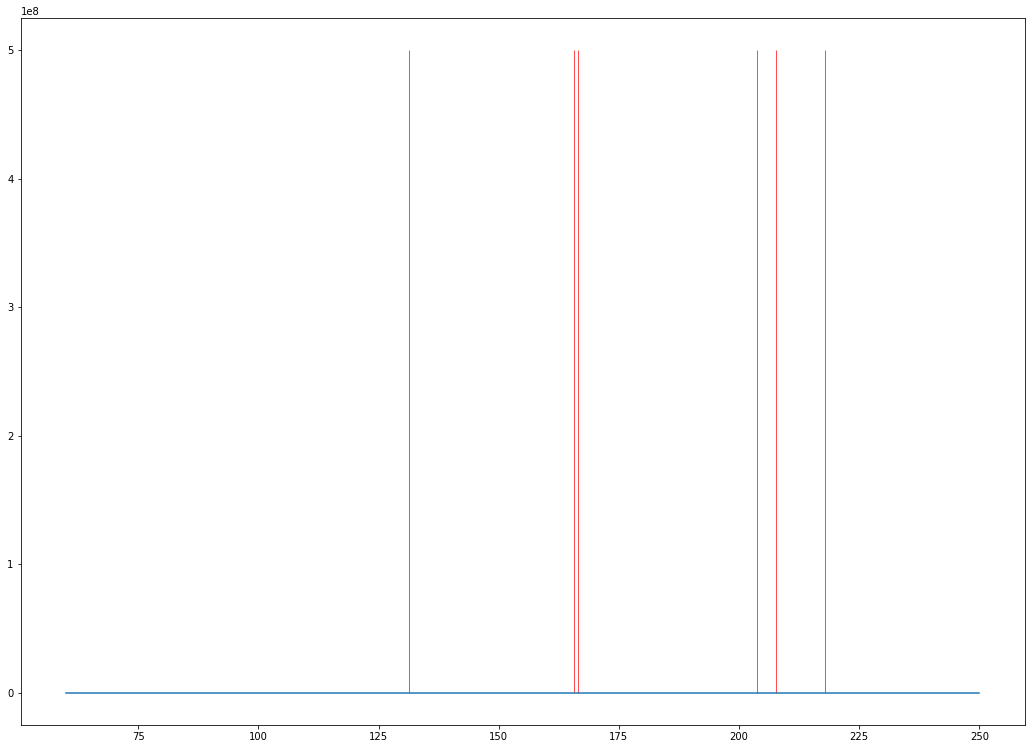

In [41]:
fig, axes = plt.subplots(figsize=(18,13))
# plt.rc('font', family='serif')
# plt.rc('axes', titlesize=25)
# plt.rc('axes', labelsize=25)

# label_size = 15 #25
# label_pad = 13 #10
# title_size = 39 #30
# title_pad = 26 #20
# axes = plt.gca()
# axes.tick_params(axis='both')
# for axis in ['top', 'bottom', 'left', 'right']:
#     axes.spines[axis].set_linewidth(2.2)
# axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
# plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
# axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
# plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


x = np.linspace(60,250,len(GainList))
axes.vlines(x = x[71], ymin = 0, ymax =5e8, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[105], ymin = 0, ymax =5e8, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[106], ymin = 0, ymax =5e8, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[143], ymin = 0, ymax =5e8, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[147], ymin = 0, ymax =5e8, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 
axes.vlines(x = x[157], ymin = 0, ymax =5e8, linestyle = '-', linewidth = 1, alpha = 0.7, color = 'red', label ='Gain correction') 

axes.plot(x, GainList_gain)
#axes.set_yscale('log')
plt.show()